In [18]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
cols = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
        'serum_sodium','sex','smoking','time','DEATH_EVENT']

df = pd.read_csv('../../../HeartFailure_Database/heart_failure_clinical_records_dataset.csv')
print(df.shape)

(299, 13)


In [20]:
print(sum(df['DEATH_EVENT']))
print(set(df['DEATH_EVENT']))


96
{0, 1}


In [21]:
arr2D = df.to_numpy()
columnIndex = -1
sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
print(sortedArr)
numZeros = list(sortedArr[:, columnIndex]).count(0)
print(numZeros)
print(sortedArr[:, -1])
livingDF, deadDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:])
livingDF.columns = cols
deadDF.columns = cols


[[6.000e+01 0.000e+00 2.261e+03 ... 0.000e+00 1.150e+02 0.000e+00]
 [4.000e+01 0.000e+00 2.440e+02 ... 0.000e+00 1.740e+02 0.000e+00]
 [8.000e+01 0.000e+00 5.820e+02 ... 0.000e+00 1.740e+02 0.000e+00]
 ...
 [4.800e+01 1.000e+00 1.310e+02 ... 0.000e+00 1.930e+02 1.000e+00]
 [6.000e+01 0.000e+00 1.660e+02 ... 0.000e+00 2.070e+02 1.000e+00]
 [7.500e+01 0.000e+00 5.820e+02 ... 0.000e+00 4.000e+00 1.000e+00]]
203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [24]:
for i in livingDF:
    print('-'*40)
    print('Column: {}'.format(i))
    print(' Bening - Min: {}, Max: {}, Mean: {:.02f}, Std Dev: {:.02f}'.format(min(livingDF[i]), max(livingDF[i]), sum(livingDF[i])/len(livingDF[i]), np.std(livingDF[i])))
    print(' Malignant - Min: {}, Max: {}, Mean: {:.02f}, Std Dev: {:.02f}'.format(min(deadDF[i]), max(deadDF[i]), sum(deadDF[i])/len(deadDF[i]), np.std(deadDF[i])))

----------------------------------------
Column: age
 Bening - Min: 40.0, Max: 90.0, Mean: 58.76, Std Dev: 10.61
 Malignant - Min: 42.0, Max: 95.0, Mean: 65.22, Std Dev: 13.15
----------------------------------------
Column: anaemia
 Bening - Min: 0.0, Max: 1.0, Mean: 0.41, Std Dev: 0.49
 Malignant - Min: 0.0, Max: 1.0, Mean: 0.48, Std Dev: 0.50
----------------------------------------
Column: creatinine_phosphokinase
 Bening - Min: 30.0, Max: 5209.0, Mean: 540.05, Std Dev: 751.94
 Malignant - Min: 23.0, Max: 7861.0, Mean: 670.20, Std Dev: 1309.71
----------------------------------------
Column: diabetes
 Bening - Min: 0.0, Max: 1.0, Mean: 0.42, Std Dev: 0.49
 Malignant - Min: 0.0, Max: 1.0, Mean: 0.42, Std Dev: 0.49
----------------------------------------
Column: ejection_fraction
 Bening - Min: 17.0, Max: 80.0, Mean: 40.27, Std Dev: 10.83
 Malignant - Min: 14.0, Max: 70.0, Mean: 33.47, Std Dev: 12.46
----------------------------------------
Column: high_blood_pressure
 Bening - Min:

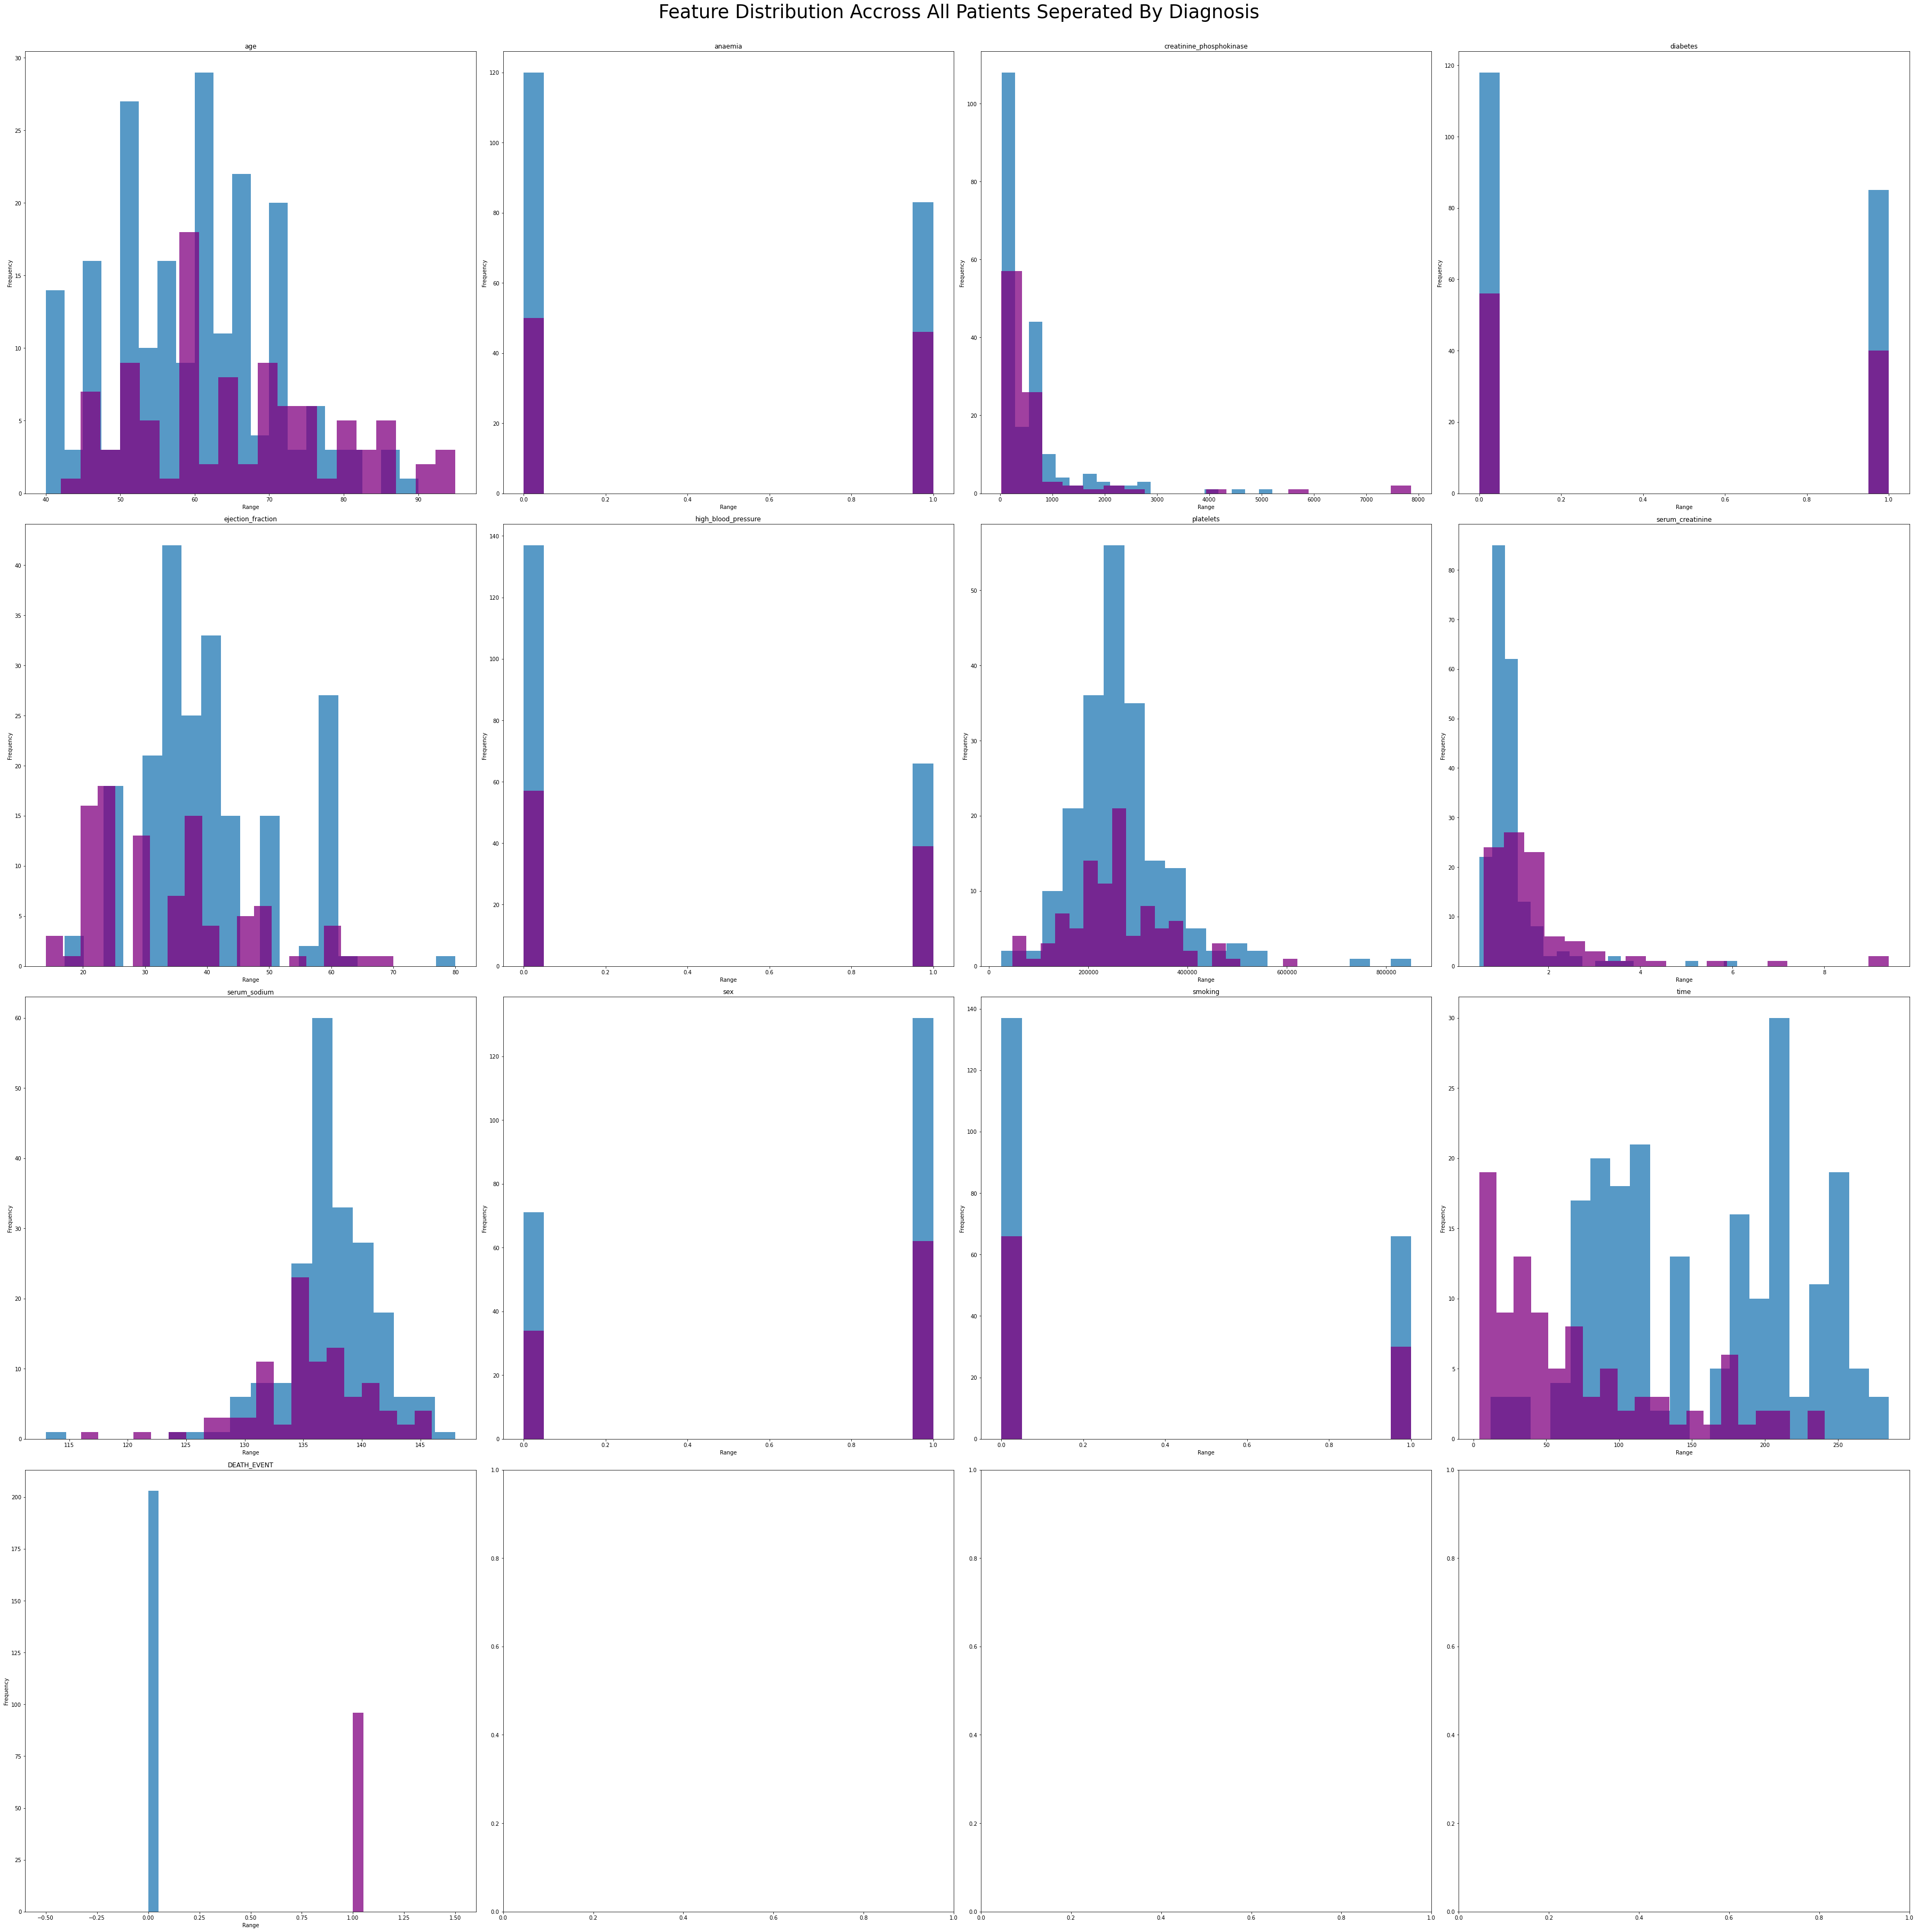

In [27]:
fig, ax = plt.subplots(4, 4, figsize = (50, 50))
plt.suptitle('Feature Distribution Accross All Patients Seperated By Diagnosis', fontsize=35, y=1.005)
counter = 0
for i in cols:
    beningHist, benignBins = np.histogram(livingDF[i], bins=20)
    maligHist, maligBins = np.histogram(deadDF[i], bins=20)
    ax[int(counter / 4), (counter % 4)].hist(livingDF[i], bins = benignBins, alpha = 0.75)
    ax[int(counter / 4), (counter % 4)].hist(deadDF[i], bins = maligBins, alpha = 0.75, color = 'purple')
    ax[int(counter / 4), (counter % 4)].set_title(i)
    ax[int(counter / 4), (counter % 4)].set_ylabel('Frequency')
    ax[int(counter / 4), (counter % 4)].set_xlabel('Range')
    counter += 1

fig.tight_layout()
plt.show()